El dataset que se me asigno se trata de un dataset que contiene la informacion de los precios de los videojuegos del año 2022. Se encuentran datos como a que compañia pertenece el juego, en que tienda se lo esta vendiendo, a que consolas esta dirigido, etc.

Nombre: Salinas Montaño Carlos

In [9]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/videgames.csv')

In [4]:
print(data)

      Unnamed: 0      Origen      Tienda Fabricante Consola       Género  \
0              0  Mediamarkt  Mediamarkt     Capcom     PS5       Acción   
1              1  Mediamarkt  Mediamarkt       Sony     PS5  Plataformas   
2              2  Mediamarkt  Mediamarkt    Ubisoft     PS5       Acción   
3              3  Mediamarkt  Mediamarkt    Ubisoft     PS5       Acción   
4              4  Mediamarkt  Mediamarkt        NaN     PS5       Terror   
...          ...         ...         ...        ...     ...          ...   
3581        3581     CD Keys    Nintendo     Capcom     NaN          NaN   
3582        3582     CD Keys    Nintendo   Nintendo     NaN          NaN   
3583        3583     CD Keys    Nintendo   Nintendo     NaN          NaN   
3584        3584     CD Keys    Nintendo   Nintendo     NaN          NaN   
3585        3585     CD Keys    Nintendo   Nintendo     NaN          NaN   

                                                 Título Precio Moneda  \
0             

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3586 non-null   int64 
 1   Origen          3586 non-null   object
 2   Tienda          3586 non-null   object
 3   Fabricante      3313 non-null   object
 4   Consola         1097 non-null   object
 5   Género          1060 non-null   object
 6   Título          3565 non-null   object
 7   Precio          3586 non-null   object
 8   Moneda          3586 non-null   object
 9   Disponibilidad  3586 non-null   object
dtypes: int64(1), object(9)
memory usage: 280.3+ KB


In [6]:

# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Precio'
columna_numerica = 'Price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3586 non-null   int64  
 1   Origen          3586 non-null   object 
 2   Tienda          3586 non-null   object 
 3   Fabricante      3313 non-null   object 
 4   Consola         1097 non-null   object 
 5   Género          1060 non-null   object 
 6   Título          3565 non-null   object 
 7   Moneda          3586 non-null   object 
 8   Disponibilidad  3586 non-null   object 
 9   Price           3442 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 280.3+ KB


In [8]:
print(data)

      Unnamed: 0      Origen      Tienda Fabricante Consola       Género  \
0              0  Mediamarkt  Mediamarkt     Capcom     PS5       Acción   
1              1  Mediamarkt  Mediamarkt       Sony     PS5  Plataformas   
2              2  Mediamarkt  Mediamarkt    Ubisoft     PS5       Acción   
3              3  Mediamarkt  Mediamarkt    Ubisoft     PS5       Acción   
4              4  Mediamarkt  Mediamarkt        NaN     PS5       Terror   
...          ...         ...         ...        ...     ...          ...   
3581        3581     CD Keys    Nintendo     Capcom     NaN          NaN   
3582        3582     CD Keys    Nintendo   Nintendo     NaN          NaN   
3583        3583     CD Keys    Nintendo   Nintendo     NaN          NaN   
3584        3584     CD Keys    Nintendo   Nintendo     NaN          NaN   
3585        3585     CD Keys    Nintendo   Nintendo     NaN          NaN   

                                                 Título Moneda Disponibilidad  \
0     

In [11]:
#Convertir variables categoricas a variables numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#Convertir variables fechas a variables numericas (si es necesario)
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [12]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [13]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3586 non-null   int64  
 1   Origen          3586 non-null   int64  
 2   Tienda          3586 non-null   int64  
 3   Fabricante      3586 non-null   int64  
 4   Consola         3586 non-null   int64  
 5   Género          3586 non-null   int64  
 6   Título          3586 non-null   int64  
 7   Moneda          3586 non-null   int64  
 8   Disponibilidad  3586 non-null   int64  
 9   Price           3442 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 280.3 KB


In [15]:
#resultado
print(data)

      Unnamed: 0  Origen  Tienda  Fabricante  Consola  Género  Título  Moneda  \
0              0       1       8          61        5       0    1629       1   
1              1       1       8         259        5      23    1677       1   
2              2       1       8         302        5       0    2001       1   
3              3       1       8         302        5       0     136       1   
4              4       1       8         329        5      29    2164       1   
...          ...     ...     ...         ...      ...     ...     ...     ...   
3581        3581       0      10          61       10      31    1290       1   
3582        3582       0      10         195       10      31    1087       1   
3583        3583       0      10         195       10      31    1554       1   
3584        3584       0      10         195       10      31    1533       1   
3585        3585       0      10         195       10      31     535       1   

      Disponibilidad  Price

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3586 non-null   int64  
 1   Origen          3586 non-null   int64  
 2   Tienda          3586 non-null   int64  
 3   Fabricante      3586 non-null   int64  
 4   Consola         3586 non-null   int64  
 5   Género          3586 non-null   int64  
 6   Título          3586 non-null   int64  
 7   Moneda          3586 non-null   int64  
 8   Disponibilidad  3586 non-null   int64  
 9   Price           3442 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 280.3 KB


In [17]:
#llenar datos vacios
columnas_especificas = ['Price']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3586 non-null   int64  
 1   Origen          3586 non-null   int64  
 2   Tienda          3586 non-null   int64  
 3   Fabricante      3586 non-null   int64  
 4   Consola         3586 non-null   int64  
 5   Género          3586 non-null   int64  
 6   Título          3586 non-null   int64  
 7   Moneda          3586 non-null   int64  
 8   Disponibilidad  3586 non-null   int64  
 9   Price           3586 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 280.3 KB


In [19]:
# Lectura de Datos
X = data.iloc[:, :9]
y = data.iloc[:, 9]
m = y.size

In [20]:
print(X)
print('*'*25)
print(y)

      Unnamed: 0  Origen  Tienda  Fabricante  Consola  Género  Título  Moneda  \
0              0       1       8          61        5       0    1629       1   
1              1       1       8         259        5      23    1677       1   
2              2       1       8         302        5       0    2001       1   
3              3       1       8         302        5       0     136       1   
4              4       1       8         329        5      29    2164       1   
...          ...     ...     ...         ...      ...     ...     ...     ...   
3581        3581       0      10          61       10      31    1290       1   
3582        3582       0      10         195       10      31    1087       1   
3583        3583       0      10         195       10      31    1554       1   
3584        3584       0      10         195       10      31    1533       1   
3585        3585       0      10         195       10      31     535       1   

      Disponibilidad  
0   

In [21]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [22]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      Unnamed: 0  Origen  Tienda  Fabricante  Consola  Género  Título  Moneda  \
0              0       1       8          61        5       0    1629       1   
1              1       1       8         259        5      23    1677       1   
2              2       1       8         302        5       0    2001       1   
3              3       1       8         302        5       0     136       1   
4              4       1       8         329        5      29    2164       1   
...          ...     ...     ...         ...      ...     ...     ...     ...   
3581        3581       0      10          61       10      31    1290       1   
3582        3582       0      10         195       10      31    1087       1   
3583        3583       0      10         195       10      31    1554       1   
3584        3584       0      10         195       10      31    1533       1   
3585        3585       0      10         195       10      31     535       1   

      Disponibilidad  
0   

In [23]:
# Añade o concatenamos el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [24]:
print(X)

[[ 1.         -1.73156787  1.50629188 ...  0.90553083 -0.40978666
  -1.3635171 ]
 [ 1.         -1.73060186  1.50629188 ...  0.98455705 -0.40978666
  -1.3635171 ]
 [ 1.         -1.72963586  1.50629188 ...  1.51798404 -0.40978666
  -1.3635171 ]
 ...
 [ 1.          1.72963586 -0.66388196 ...  0.78205235 -0.40978666
  -0.22349091]
 [ 1.          1.73060186 -0.66388196 ...  0.74747838 -0.40978666
  -0.22349091]
 [ 1.          1.73156787 -0.66388196 ... -0.89560847 -0.40978666
  -0.22349091]]


In [25]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [26]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [75.25188783 25.8577751  10.73192108 -6.47831866 -4.43000252 -4.51502765
 -9.22874303 18.21118798 56.55925282 20.12567054]
El valor predecido es (usando el descenso por el gradiente): 53.9729


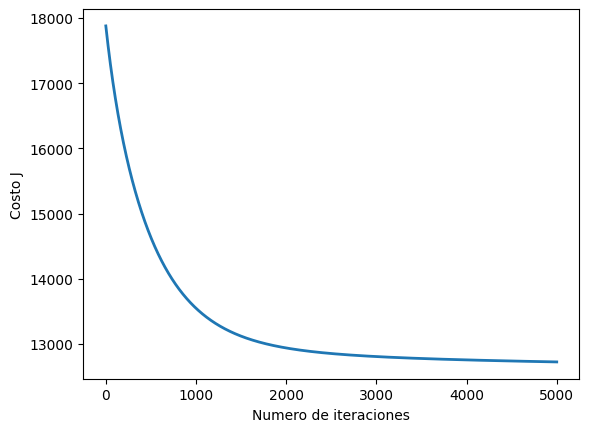

In [27]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un telefono celular con sus distintas caracteristicas
X_array = [1, 1, 1, 8, 64, 5, 23, 1680, 1, 1]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [28]:
X_array = [1, 1, 1, 8, 64, 5, 23, 1680, 1, 1]
X_array[1:8] = (X_array[1:13] - mu) / sigma

In [29]:
X_array[1:10]

[-1.7306018641436278,
 1.50629187853363,
 -1.0072690649642564,
 -1.1948699470062691,
 -0.9204734125298084,
 -0.10680513573847017,
 0.989496185405654,
 -0.40978666330697,
 -0.22349091264891835]

In [30]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [32]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio de un telefono celular con sus distintas caracteristicas mediante la media

X_array = [1, 1, 1, 8, 64, 5, 23, 1680, 1, 1]
price = np.dot(X_array, theta)

print('Precio predecido para un videojuego con sus diferentes caracteristicas (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 75.76108658  57.83362783 101.00223039   6.33893101  -9.75896165
  11.27998185  -4.21968673  18.51561232  60.86872851  56.12675553]
Precio predecido para un videojuego con sus diferentes caracteristicas (usando la ecuación de la normal): $30843
